u190450

Task 1:

TP: 4

FP: 3

FN: 2

TN: 1

Accuracy = 0.6
Precision = 0.57
Recall = 0.8
F1 = 0.67

Five labels were correctly predicted (1 dog and 4 cat labels), which, taking into account that there are 5000 dogs and 200 cats in the dataset, is a fairly good performance.

If a tumor screening device is introduced, recall may point at how many people subjected to the screening who have the tumor in question were registered by the new device.
Precision, on the other hand, looks at the predicted scores, meaning that it indicates how many persons of the predicted number actually have tumor.

Case 1. 20% of the data may not be sufficient to cover all cases in 100% of the dataset, which may endanger the reliability of the prediction. In addition, the specified error may reflect the lack of proper planning for a training and test set.

Case 2. The fact that the model performs better on the test set than on the train set hints at the possibility  of underfitting, which often goes hand-in-hand with a large value of k.

Case 3. Adding a baseline helps to discover the quality of the model. In this case, with the given baseline, the model seems to perform well.

Case 4. The test set is supposed to be hidden throughout the entire process, hence going back and modifying the k-value is not permitted.

Case 5. Labels should not be removed because the model seems to be unable to predict them. Moreover, manipulating them after the analysis is not permitted.

Case 6. Accuracy in this case is not the best measure. Precision would be much more valuable, as it shows the ratio of true positives and true positives and false positives.

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as py
df = pd.read_csv('/srv/data-mining/data/IMDB/imdb.csv', index_col=None, na_values="?")
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,quality
0,Color,James-Cameron,723.0,178.0,0.0,855.0,Joel-David-Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,good
1,Color,Gore-Verbinski,302.0,169.0,563.0,1000.0,Orlando-Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,good
2,Color,Sam-Mendes,602.0,148.0,0.0,161.0,Rory-Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,okay
3,Color,Christopher-Nolan,813.0,164.0,22000.0,23000.0,Christian-Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,very-good
4,NaN,Doug-Walker,NaN,NaN,131.0,NaN,Rob-Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,good
5,Color,Andrew-Stanton,462.0,132.0,475.0,530.0,Samantha-Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,okay
6,Color,Sam-Raimi,392.0,156.0,0.0,4000.0,James-Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,okay
7,Color,Nathan-Greno,324.0,100.0,15.0,284.0,Donna-Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,good
8,Color,Joss-Whedon,635.0,141.0,0.0,19000.0,Robert-Downey-Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,good
9,Color,David-Yates,375.0,153.0,282.0,10000.0,Daniel-Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,good


In [2]:
df['quality']

0            good
1            good
2            okay
3       very-good
4            good
5            okay
6            okay
7            good
8            good
9            good
10           okay
11           okay
12           okay
13           good
14           okay
15           good
16           okay
17      very-good
18           okay
19           okay
20           good
21           good
22           okay
23           good
24           okay
25           good
26           good
27      very-good
28           okay
29           good
          ...    
4999         okay
5000          bad
5001    very-good
5002          bad
5003         okay
5004          bad
5005         okay
5006         okay
5007         okay
5008         good
5009         okay
5010         okay
5011         good
5012         okay
5013         good
5014         okay
5015         good
5016          bad
5017          bad
5018         okay
5019          bad
5020          bad
5021         okay
5022         good
5023      

In [3]:
df[['director_name', 'quality']]

,director_name,quality
0,James-Cameron,good
1,Gore-Verbinski,good
2,Sam-Mendes,okay
3,Christopher-Nolan,very-good
4,Doug-Walker,good
5,Andrew-Stanton,okay
6,Sam-Raimi,okay
7,Nathan-Greno,good
8,Joss-Whedon,good
9,David-Yates,good


In [4]:
df[['quality', 'imdb_score']]

,quality,imdb_score
0,good,7.9
1,good,7.1
2,okay,6.8
3,very-good,8.5
4,good,7.1
5,okay,6.6
6,okay,6.2
7,good,7.8
8,good,7.5
9,good,7.5


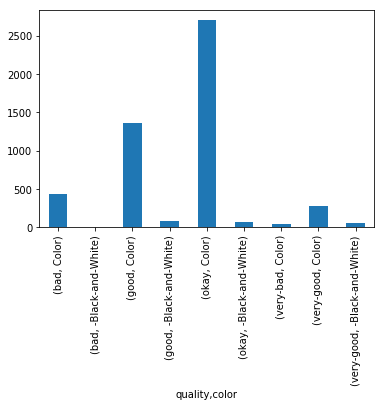

In [5]:
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
df.groupby("quality")["color"].value_counts().plot(kind='Bar')

In [6]:
type ('gross')

str

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gross'] = le.fit_transform(df['gross'])

In [8]:
df['budget'] = le.fit_transform(df['budget'])

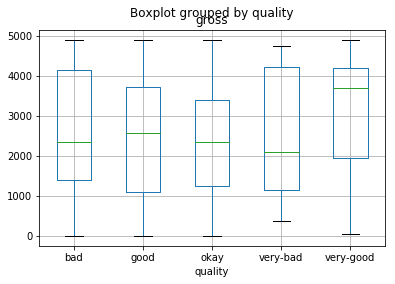

In [9]:
df.boxplot(column=['gross'], by='quality')

In [10]:
df.pop('num_critic_for_reviews')

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
5       462.0
6       392.0
7       324.0
8       635.0
9       375.0
10      673.0
11      434.0
12      403.0
13      313.0
14      450.0
15      733.0
16      258.0
17      703.0
18      448.0
19      451.0
20      422.0
21      599.0
22      343.0
23      509.0
24      251.0
25      446.0
26      315.0
27      516.0
28      377.0
29      644.0
        ...  
4999      3.0
5000      2.0
5001     71.0
5002      7.0
5003     61.0
5004      3.0
5005     52.0
5006      NaN
5007     53.0
5008    136.0
5009      8.0
5010     43.0
5011     80.0
5012    233.0
5013     28.0
5014     58.0
5015     61.0
5016      NaN
5017      1.0
5018      5.0
5019     43.0
5020      NaN
5021     51.0
5022      6.0
5023     22.0
5024     42.0
5025     73.0
5026     81.0
5027     64.0
5028     12.0
Name: num_critic_for_reviews, dtype: float64

In [11]:
df['quality_numeric'] = df['quality'].replace({ "very-bad" : 1, "bad" : 2, "okay" : 3, "good" : 4, "very-good" : 5 }, inplace=True)

(0.89788954453413428, 0.0)

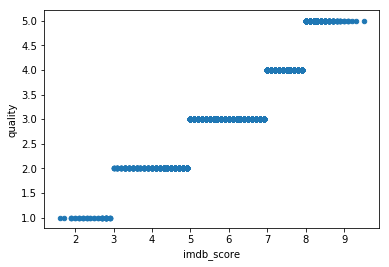

In [12]:
from scipy.stats import pearsonr
df.plot(x='imdb_score', y='quality', kind='scatter')
pearsonr(df['imdb_score'], df['quality'])

In [13]:
from sklearn.model_selection import train_test_split
df2 = df.select_dtypes(include =["number"])

In [14]:
df2=df2.fillna(0)
y = df2["imdb_score"]
x = df2[["actor_1_facebook_likes","actor_3_facebook_likes","movie_facebook_likes"]]
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
list(zip(df.columns[:-1], lr.coef_))

[('color', 6.3100347303800054e-06),
 ('director_name', -2.0053325949677025e-05),
 ('duration', 1.459910556279501e-05)]

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = lr.predict (x_test)
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_model

1.1284370926819947